# Worksheet 18

Name: Seunghwan Hyun 
UID: U68035800

### Topics

- Linear Regression

### Optional Challenge

Every day my alarm goes off at seemingly random times… I’ve recorded the times at which it goes off for the past year of so (1 - 355 days). Today is day 356. Can you predict when my alarm will ring using `data.csv`?

Please fill out the piazza poll if you think you found the answer.

## Linear Regression

a) Create and plot a dataset of 100 (Y, X) points where `Y = 1 + 0.5 * X + eps`.

In [43]:
from datetime import datetime
import pandas as pd
data = pd.read_csv('data.csv')

# datetime.strptime(data['alarm (%H:%M:%S)'][0], '%H:%M:%S')

print(type(data['alarm (%H:%M:%S)'][0]))

def strtotime(time): 
    out = datetime.strptime(time, '%H:%M:%S')
    return out

data['time'] = data['alarm (%H:%M:%S)'].apply(strtotime)

print(data.columns)
print(type(data['alarm (%H:%M:%S)'][0]))

<class 'str'>
Index(['day', 'alarm (%H:%M:%S)', 'time'], dtype='object')
<class 'str'>


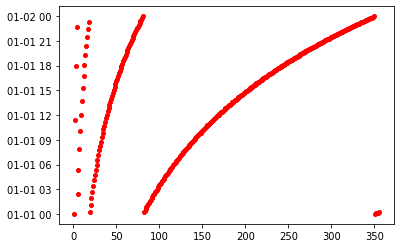

In [44]:
plt.plot(data['day'], data['time'],'ro',markersize=4)
plt.show()

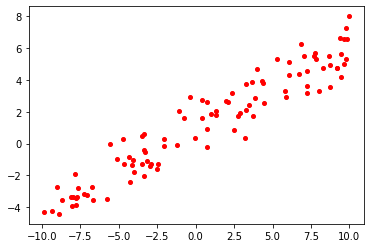

In [21]:
import numpy as np
import matplotlib.pyplot as plt

SAMPLE_SIZE = 100

true_beta = np.array([ 1 , .5 ])
x = -10.0 + 20.0 * np.random.random(SAMPLE_SIZE)
y = true_beta[0] + true_beta[1] * x + np.random.randn(SAMPLE_SIZE)
plt.plot(x,y,'ro',markersize=4)
plt.show()

b) Plot the least squares estimate line through the scatter plot.

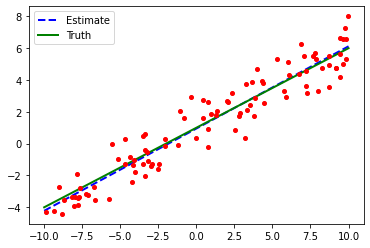

In [32]:
intercept = np.ones(np.shape(x)[0])
X = np.array([intercept, x]).T
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y

x_plot = np.linspace(-10,10,50)
y_est = beta_hat[0] + beta_hat[1] * x_plot
plt.plot(x_plot, y_est,'b--', lw=2, label='Estimate')
plt.plot(x_plot, true_beta[0] + true_beta[1] * x_plot, lw=2, c='g', label='Truth')
plt.plot(x, y,'ro',markersize=4)
plt.legend()
plt.show()

c) How does the estimate of `beta` compare to the parameters we used to generate the data?

In [36]:
print(f'estimated values of beta are', beta_hat)
print(f'true values of beta are', true_beta)

estimated values of beta are [0.94912582 0.51691786]
true values of beta are [1.  0.5]


Estiamte of beta is very close to the true beta values

d) Create and plot a dataset of 100 (Y, X) points where `Y = 1 + 3 * X + .5 * X^2 + eps`.

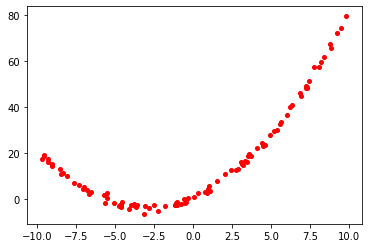

In [45]:
import numpy as np
import matplotlib.pyplot as plt

SAMPLE_SIZE = 100

true_beta = np.array([ 1 , 3 , .5 ])
x = -10.0 + 20.0 * np.random.random(SAMPLE_SIZE)
y = true_beta[0] + true_beta[1] * x + true_beta[2] * x**2 + np.random.randn(SAMPLE_SIZE)
plt.plot(x,y,'ro',markersize=4)
plt.show()

e) Plot the least squares estimate line through the scatter plot.

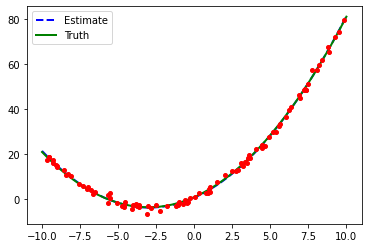

In [54]:
intercept = np.ones(np.shape(x)[0])
X = np.array([intercept, x, x**2]).T
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y

x_plot = np.linspace(-10,10,50)
y_est = beta_hat[0] + beta_hat[1] * x_plot + beta_hat[2] * x_plot**2
plt.plot(x_plot, y_est,'b--', lw=2, label='Estimate')
plt.plot(x_plot, true_beta[0] + true_beta[1] * x_plot + true_beta[2] * x_plot**2, lw=2, c='g', label='Truth')

plt.plot(x, y,'ro',markersize=4)
plt.legend()
plt.show()

f) How does the estimate of `beta` compare to the parameters we used to generate the data?

In [55]:
print(f'estimated values of beta are', beta_hat)
print(f'true values of beta are', true_beta)

estimated values of beta are [0.7696966  2.98641945 0.50558873]
true values of beta are [1.  3.  0.5]


Estimated beta value and true beta are very close.

g) Let's repeat d) and f) a large number of times to see how close our estimates are on average and what that distribution looks like.

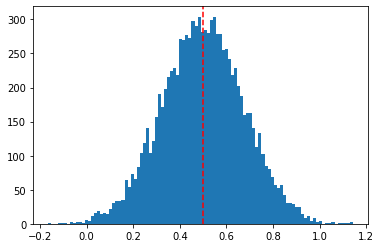

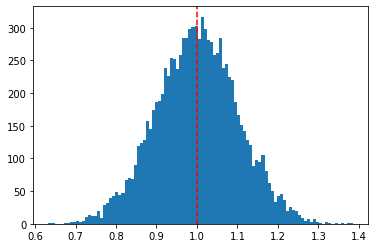

In [58]:
import numpy as np
import matplotlib.pyplot as plt

betas = []
true_beta = np.array([1,.5])
SAMPLE_SIZE = 100
for _ in range(10000):
    x = -1 + 2 * np.random.random(SAMPLE_SIZE)
    y = true_beta[0] + true_beta[1] * x + np.random.randn(SAMPLE_SIZE)
    intercept = np.ones(np.shape(x)[0])
    X = np.array([intercept, x]).T
    beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y

    betas.append(beta_hat)

plt.hist(np.array(betas)[:, 1], bins=100)
plt.axvline(x=true_beta[1], c='r', linestyle='dashed')
plt.show()

plt.hist(np.array(betas)[:, 0], bins=100)
plt.axvline(x=true_beta[0], c='r', linestyle='dashed')
plt.show()